In [1]:
# Importo paquetes

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, normalize
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, linear_model, preprocessing
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [2]:
# Para ver mejor

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [3]:
# Cargo el primer train - con la proporción de labels positivos original

train = pd.read_csv("./DATA/CLIC_TRAIN_2.csv", sep=';')
test = pd.read_csv("./DATA/CLIC_TEST.csv", sep=';')
train.head(100)

C:\Users\juan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Label,action_categorical_0,action_categorical_1,action_categorical_3,action_categorical_5,action_categorical_7,auction_boolean_0,auction_categorical_1,auction_categorical_4,auction_categorical_5,auction_categorical_6,auction_categorical_8,creative_categorical_1,creative_categorical_4,creative_categorical_9,creative_categorical_11,creative_categorical_8,auction_bidfloor,creative_width,creative_height,device_id_type,has_video,timezone_offset,auction_time,ID
0,0,c2e4f717,3074db21,62c903fc,6bc0e29c,e2538fca,79ceee49,714a9147,ef64698f,ec8edf0b,3117d02e,198c733d,977c2300,150d94b7,65dcab89,65dcab89,Otros,"8,9999999999999997E-2",320,50,c1d12c8e,0,1,1516051438,{A03E750C-A46F-4328-9A58-000001C6089C}
1,0,c2e4f717,3074db21,62c903fc,6bc0e29c,e2538fca,79ceee49,714a9147,7db9dc73,ec8edf0b,ed14c0c3,198c733d,35fcfcbb,150d94b7,65dcab89,65dcab89,Otros,"8,9999999999999997E-2",320,50,c1d12c8e,0,1,1516221663,{C09A7F30-AF3D-4A17-8044-000004A97A01}
2,0,11b7af3d,ac0f362d,cb80abab,6bc0e29c,31b31f57,47980dda,714a9147,7db9dc73,c99696ad,3117d02e,198c733d,977c2300,NaN,65dcab89,43c867fd,Otros,"1,5700000000000001",0,0,6324b367,0,1,1516198546,{2F02924C-E92F-44D9-A230-0000058AABBD}
3,0,11b7af3d,ac0f362d,cb80abab,6bc0e29c,31b31f57,47980dda,714a9147,ef64698f,c99696ad,7d7776ec,198c733d,977c2300,NaN,65dcab89,43c867fd,Otros,"0,68000000000000005",0,0,6324b367,0,1,1516525257,{FBC73BD2-F509-434C-B711-000005C1CA00}
4,0,604d011f,f71d2f9b,2427063c,79ceee49,e2538fca,47980dda,1be29569,ef64698f,c99696ad,fccb6ea5,198c733d,977c2300,7f1dcf83,65dcab89,65dcab89,Otros,"0,20000000000000001",320,50,6324b367,0,4,1516421853,{2100A8BC-43B1-405F-A90A-0000061F03A3}
5,0,604d011f,f71d2f9b,2427063c,79ceee49,e2538fca,47980dda,1be29569,ef64698f,c99696ad,fccb6ea5,198c733d,35fcfcbb,150d94b7,65dcab89,65dcab89,Otros,"0,02",300,250,42080e25,0,4,1516382007,{F0D6C5A7-0255-48E3-ACEE-00000A2DBE1E}
6,0,11b7af3d,ac0f362d,cb80abab,6bc0e29c,31b31f57,43c867fd,714a9147,ef64698f,c99696ad,434922cf,Otros,35fcfcbb,7f1dcf83,NaN,65dcab89,Otros,"8,0000000000000002E-2",0,0,6324b367,0,1,1516273082,{21EC4CDF-F6ED-474D-B0DD-00000AC6F38F}
7,0,9915ffee,d9eb38d8,9ebdf82c,6bc0e29c,31b31f57,47980dda,714a9147,ef64698f,c99696ad,3117d02e,198c733d,977c2300,NaN,65dcab89,43c867fd,Otros,"8,9999999999999997E-2",0,0,6324b367,0,1,1516204309,{944BF782-8BF0-4087-8A54-00000B089FDE}
8,0,11b7af3d,0d132da2,f51428b0,6bc0e29c,31b31f57,79ceee49,714a9147,ef64698f,ec8edf0b,7d7776ec,198c733d,977c2300,NaN,65dcab89,43c867fd,Otros,"8,9999999999999997E-2",0,0,c1d12c8e,0,1,1516403125,{2DEF15A6-1F6B-4A8D-B239-00000F49EF0F}
9,0,604d011f,f71d2f9b,2427063c,79ceee49,e2538fca,47980dda,1be29569,ef64698f,c99696ad,0fa26b70,198c733d,35fcfcbb,150d94b7,65dcab89,65dcab89,Otros,"7,0000000000000007E-2",300,250,6324b367,0,4,1516550028,{9CB00C70-8DB4-4167-B68A-00000F93C737}


In [4]:
train.Label.value_counts()

0    945361
1    102003
Name: Label, dtype: int64

In [5]:
train.columns

Index(['Label', 'action_categorical_0', 'action_categorical_1',
       'action_categorical_3', 'action_categorical_5', 'action_categorical_7',
       'auction_boolean_0', 'auction_categorical_1', 'auction_categorical_4',
       'auction_categorical_5', 'auction_categorical_6',
       'auction_categorical_8', 'creative_categorical_1',
       'creative_categorical_4', 'creative_categorical_9',
       'creative_categorical_11', 'creative_categorical_8', 'auction_bidfloor',
       'creative_width', 'creative_height', 'device_id_type', 'has_video',
       'timezone_offset', 'auction_time', 'ID'],
      dtype='object')

In [6]:
train.dtypes

Label                       int64
action_categorical_0       object
action_categorical_1       object
action_categorical_3       object
action_categorical_5       object
action_categorical_7       object
auction_boolean_0          object
auction_categorical_1      object
auction_categorical_4      object
auction_categorical_5      object
auction_categorical_6      object
auction_categorical_8      object
creative_categorical_1     object
creative_categorical_4     object
creative_categorical_9     object
creative_categorical_11    object
creative_categorical_8     object
auction_bidfloor           object
creative_width              int64
creative_height             int64
device_id_type             object
has_video                   int64
timezone_offset            object
auction_time                int64
ID                         object
dtype: object

In [7]:
train.isnull().sum()

Label                           0
action_categorical_0            0
action_categorical_1            0
action_categorical_3            0
action_categorical_5            0
action_categorical_7            0
auction_boolean_0           18910
auction_categorical_1           0
auction_categorical_4        3336
auction_categorical_5           0
auction_categorical_6           0
auction_categorical_8           0
creative_categorical_1          0
creative_categorical_4     180319
creative_categorical_9      12628
creative_categorical_11         0
creative_categorical_8          0
auction_bidfloor                0
creative_width                  0
creative_height                 0
device_id_type                  0
has_video                       0
timezone_offset                 0
auction_time                    0
ID                              0
dtype: int64

In [8]:
# Covertir Obj a Float

train['auction_bidfloor'] = train['auction_bidfloor'].str.replace(',', '.').apply(lambda col:pd.to_numeric(col, errors='coerce'))
test['auction_bidfloor'] = test['auction_bidfloor'].str.replace(',', '.').apply(lambda col:pd.to_numeric(col, errors='coerce'))

train['timezone_offset'] = train['timezone_offset'].str.replace(',', '.').apply(lambda col:pd.to_numeric(col, errors='coerce'))
test['timezone_offset'] = test['timezone_offset'].str.replace(',', '.').apply(lambda col:pd.to_numeric(col, errors='coerce'))

In [9]:
train.isnull().sum()

Label                           0
action_categorical_0            0
action_categorical_1            0
action_categorical_3            0
action_categorical_5            0
action_categorical_7            0
auction_boolean_0           18910
auction_categorical_1           0
auction_categorical_4        3336
auction_categorical_5           0
auction_categorical_6           0
auction_categorical_8           0
creative_categorical_1          0
creative_categorical_4     180319
creative_categorical_9      12628
creative_categorical_11         0
creative_categorical_8          0
auction_bidfloor                0
creative_width                  0
creative_height                 0
device_id_type                  0
has_video                       0
timezone_offset             65536
auction_time                    0
ID                              0
dtype: int64

In [10]:
# Creamos dummies para train y para test

categories = ['action_categorical_0', 'action_categorical_1',
       'action_categorical_3', 'action_categorical_5', 'action_categorical_7',
       'auction_boolean_0', 'auction_categorical_1', 'auction_categorical_4',
       'auction_categorical_5', 'auction_categorical_6',
       'auction_categorical_8', 'creative_categorical_1',
       'creative_categorical_4', 'creative_categorical_9',
       'creative_categorical_11', 'creative_categorical_8',
       'device_id_type']

for category in categories:
    series = train[category]
    dummies = pd.get_dummies(series, prefix=category,  drop_first=True)
    train = pd.concat([train, dummies], axis=1)
    
for category in categories:
    series = test[category]
    dummies = pd.get_dummies(series, prefix=category, drop_first=True)
    test = pd.concat([test, dummies], axis=1)

In [11]:
train.columns

Index(['Label', 'action_categorical_0', 'action_categorical_1',
       'action_categorical_3', 'action_categorical_5', 'action_categorical_7',
       'auction_boolean_0', 'auction_categorical_1', 'auction_categorical_4',
       'auction_categorical_5', 'auction_categorical_6',
       'auction_categorical_8', 'creative_categorical_1',
       'creative_categorical_4', 'creative_categorical_9',
       'creative_categorical_11', 'creative_categorical_8', 'auction_bidfloor',
       'creative_width', 'creative_height', 'device_id_type', 'has_video',
       'timezone_offset', 'auction_time', 'ID',
       'action_categorical_0_604d011f', 'action_categorical_0_9915ffee',
       'action_categorical_0_Otros', 'action_categorical_0_c2e4f717',
       'action_categorical_0_e350c7c7', 'action_categorical_1_3074db21',
       'action_categorical_1_6d1ca31b', 'action_categorical_1_Otros',
       'action_categorical_1_ac0f362d', 'action_categorical_1_d9eb38d8',
       'action_categorical_1_dc24b79b', 'ac

In [12]:
train.describe()

,Label,auction_bidfloor,creative_width,creative_height,has_video,timezone_offset,auction_time,action_categorical_0_604d011f,action_categorical_0_9915ffee,action_categorical_0_Otros,action_categorical_0_c2e4f717,action_categorical_0_e350c7c7,action_categorical_1_3074db21,action_categorical_1_6d1ca31b,action_categorical_1_Otros,action_categorical_1_ac0f362d,action_categorical_1_d9eb38d8,action_categorical_1_dc24b79b,action_categorical_1_e220fce9,action_categorical_1_e709bbc0,action_categorical_1_f71d2f9b,action_categorical_3_62c903fc,action_categorical_3_7ce4e1a3,action_categorical_3_9ebdf82c,action_categorical_3_Otros,action_categorical_3_cb80abab,action_categorical_3_e7329a92,action_categorical_3_e9c266f7,action_categorical_3_f51428b0,action_categorical_5_79ceee49,action_categorical_7_afc0ea45,action_categorical_7_e2538fca,auction_boolean_0_47980dda,auction_boolean_0_79ceee49,auction_categorical_1_714a9147,auction_categorical_1_ababfacb,auction_categorical_4_ef64698f,auction_categorical_5_ec8edf0b,auction_categorical_6_3117d02e,auction_categorical_6_434922cf,auction_categorical_6_6f5a8fcb,auction_categorical_6_7d7776ec,auction_categorical_6_Otros,auction_categorical_6_e70caf72,auction_categorical_6_ed14c0c3,auction_categorical_6_fccb6ea5,auction_categorical_8_856f1b75,auction_categorical_8_Otros,auction_categorical_8_e361d5bc,creative_categorical_1_977c2300,creative_categorical_4_7f1dcf83,creative_categorical_4_f3b258d1,creative_categorical_9_65dcab89,creative_categorical_11_65dcab89,creative_categorical_8_5e63aaac,creative_categorical_8_Otros,creative_categorical_8_d9d53fe0,device_id_type_6324b367,device_id_type_88bcf6c1,device_id_type_c1d12c8e
count,1.047364e+06,1.047364e+06,1.047364e+06,1.047364e+06,1.047364e+06,981828.000000,1.047364e+06,1.047364e+06,1.047364e+06,1.047364e+06,1.047364e+06,1.047364e+06,1.047364e+06,1.047364e+06,1.047364e+06,1.047364e+06,1.047364e+06,1.047364e+06,1.047364e+06,1.047364e+06,1.047364e+06,1.047364e+06,1.047364e+06,1.047364e+06,1.047364e+06,1.047364e+06,1.047364e+06,1.047364e+06,1.047364e+06,1.047364e+06,1.047364e+06,1.047364e+06,1.047364e+06,1.047364e+06,1.047364e+06,1.047364e+06,1.047364e+06,1.047364e+06,1.047364e+06,1.047364e+06,1.047364e+06,1.047364e+06,1.047364e+06,1.047364e+06,1.047364e+06,1.047364e+06,1.047364e+06,1.047364e+06,1.047364e+06,1.047364e+06,1.047364e+06,1.047364e+06,1.047364e+06,1.047364e+06,1.047364e+06,1.047364e+06,1.047364e+06,1.047364e+06,1.047364e+06,1.047364e+06
mean,9.739021e-02,5.977436e-01,2.661581e+02,1.153640e+02,2.243442e-02,1.773654,1.516302e+09,1.607244e-01,2.606830e-01,9.280728e-02,1.726229e-01,9.664071e-02,1.254998e-01,5.950271e-02,4.142017e-02,1.378919e-01,1.381392e-01,1.225438e-01,9.664071e-02,4.712306e-02,1.526088e-01,1.254998e-01,1.225438e-01,1.381392e-01,1.221896e-01,1.378919e-01,4.712306e-02,9.664071e-02,7.862978e-02,1.722458e-01,2.864334e-06,6.118007e-01,6.985480e-01,2.715617e-01,7.972367e-01,3.543372e-02,6.971416e-01,4.047275e-01,7.522791e-02,1.184392e-01,5.208791e-02,6.452103e-02,1.923677e-01,5.791492e-02,2.390993e-01,8.317166e-02,1.162557e-01,8.809258e-02,1.309430e-01,6.423077e-01,3.242980e-01,5.551079e-03,9.140137e-01,8.409636e-01,8.211090e-05,9.813112e-01,5.551079e-03,5.918897e-01,9.547779e-07,4.047265e-01
std,2.964885e-01,1.169912e+00,1.295398e+02,1.337454e+02,1.480916e-01,1.911338,1.780818e+05,3.672768e-01,4.390075e-01,2.901623e-01,3.779211e-01,2.954680e-01,3.312850e-01,2.365633e-01,1.992601e-01,3.447866e-01,3.450462e-01,3.279130e-01,2.954680e-01,2.119022e-01,3.596102e-01,3.312850e-01,3.279130e-01,3.450462e-01,3.275048e-01,3.447866e-01,2.119022e-01,2.954680e-01,2.691602e-01,3.775941e-01,1.692433e-03,4.873406e-01,4.588888e-01,4.447653e-01,4.020578e-01,1.848735e-01,4.594947e-01,4.908395e-01,2.637589e-01,3.231277e-01,2.222044e-01,2.456789e-01,3.941605e-01,2.335826e-01,4.265337e-01,2.761416e-01,3.205314e-01,2.834296e-01,3.373382e-01,4.793211e-01,4.681122e-01,7.429852e-02,2.803440e-01,3.657102e-01,9.061139e-03,1.354237e-01,7.429852e-02,4.914840e-01,9.77

In [13]:
y_train = train[['Label']]
x_train = train[['auction_bidfloor',
       'creative_width', 'creative_height', 'has_video',
       'auction_time',
       'action_categorical_0_604d011f', 'action_categorical_0_9915ffee',
       'action_categorical_0_Otros', 'action_categorical_0_c2e4f717',
       'action_categorical_0_e350c7c7', 'action_categorical_1_3074db21',
       'action_categorical_1_6d1ca31b', 'action_categorical_1_Otros',
       'action_categorical_1_ac0f362d', 'action_categorical_1_d9eb38d8',
       'action_categorical_1_dc24b79b', 'action_categorical_1_e220fce9',
       'action_categorical_1_e709bbc0', 'action_categorical_1_f71d2f9b',
       'action_categorical_3_62c903fc', 'action_categorical_3_7ce4e1a3',
       'action_categorical_3_9ebdf82c', 'action_categorical_3_Otros',
       'action_categorical_3_cb80abab', 'action_categorical_3_e7329a92',
       'action_categorical_3_e9c266f7', 'action_categorical_3_f51428b0',
       'action_categorical_5_79ceee49', 'action_categorical_7_e2538fca',
       'auction_boolean_0_47980dda', 'auction_boolean_0_79ceee49',
       'auction_categorical_1_714a9147', 'auction_categorical_1_ababfacb',
       'auction_categorical_4_ef64698f', 'auction_categorical_5_ec8edf0b',
       'auction_categorical_6_3117d02e', 'auction_categorical_6_434922cf',
       'auction_categorical_6_6f5a8fcb', 'auction_categorical_6_7d7776ec',
       'auction_categorical_6_Otros', 'auction_categorical_6_e70caf72',
       'auction_categorical_6_ed14c0c3', 'auction_categorical_6_fccb6ea5',
       'auction_categorical_8_856f1b75', 'auction_categorical_8_Otros',
       'auction_categorical_8_e361d5bc', 'creative_categorical_1_977c2300',
       'creative_categorical_4_7f1dcf83', 'creative_categorical_4_f3b258d1',
       'creative_categorical_9_65dcab89', 'creative_categorical_11_65dcab89',
       'creative_categorical_8_5e63aaac', 'creative_categorical_8_Otros',
       'creative_categorical_8_d9d53fe0', 'device_id_type_6324b367',
       'device_id_type_c1d12c8e']]

y_test = test[['Label']]
x_test = test[['auction_bidfloor',
       'creative_width', 'creative_height', 'has_video',
       'auction_time',
       'action_categorical_0_604d011f', 'action_categorical_0_9915ffee',
       'action_categorical_0_Otros', 'action_categorical_0_c2e4f717',
       'action_categorical_0_e350c7c7', 'action_categorical_1_3074db21',
       'action_categorical_1_6d1ca31b', 'action_categorical_1_Otros',
       'action_categorical_1_ac0f362d', 'action_categorical_1_d9eb38d8',
       'action_categorical_1_dc24b79b', 'action_categorical_1_e220fce9',
       'action_categorical_1_e709bbc0', 'action_categorical_1_f71d2f9b',
       'action_categorical_3_62c903fc', 'action_categorical_3_7ce4e1a3',
       'action_categorical_3_9ebdf82c', 'action_categorical_3_Otros',
       'action_categorical_3_cb80abab', 'action_categorical_3_e7329a92',
       'action_categorical_3_e9c266f7', 'action_categorical_3_f51428b0',
       'action_categorical_5_79ceee49', 'action_categorical_7_e2538fca',
       'auction_boolean_0_47980dda', 'auction_boolean_0_79ceee49',
       'auction_categorical_1_714a9147', 'auction_categorical_1_ababfacb',
       'auction_categorical_4_ef64698f', 'auction_categorical_5_ec8edf0b',
       'auction_categorical_6_3117d02e', 'auction_categorical_6_434922cf',
       'auction_categorical_6_6f5a8fcb', 'auction_categorical_6_7d7776ec',
       'auction_categorical_6_Otros', 'auction_categorical_6_e70caf72',
       'auction_categorical_6_ed14c0c3', 'auction_categorical_6_fccb6ea5',
       'auction_categorical_8_856f1b75', 'auction_categorical_8_Otros',
       'auction_categorical_8_e361d5bc', 'creative_categorical_1_977c2300',
       'creative_categorical_4_7f1dcf83', 'creative_categorical_4_f3b258d1',
       'creative_categorical_9_65dcab89', 'creative_categorical_11_65dcab89',
       'creative_categorical_8_5e63aaac', 'creative_categorical_8_Otros',
       'creative_categorical_8_d9d53fe0', 'device_id_type_6324b367',
       'device_id_type_c1d12c8e']]

del train, test

In [14]:
x_test.dtypes

auction_bidfloor                    float64
creative_width                        int64
creative_height                       int64
has_video                             int64
auction_time                          int64
action_categorical_0_604d011f         uint8
action_categorical_0_9915ffee         uint8
action_categorical_0_Otros            uint8
action_categorical_0_c2e4f717         uint8
action_categorical_0_e350c7c7         uint8
action_categorical_1_3074db21         uint8
action_categorical_1_6d1ca31b         uint8
action_categorical_1_Otros            uint8
action_categorical_1_ac0f362d         uint8
action_categorical_1_d9eb38d8         uint8
action_categorical_1_dc24b79b         uint8
action_categorical_1_e220fce9         uint8
action_categorical_1_e709bbc0         uint8
action_categorical_1_f71d2f9b         uint8
action_categorical_3_62c903fc         uint8
action_categorical_3_7ce4e1a3         uint8
action_categorical_3_9ebdf82c         uint8
action_categorical_3_Otros      

In [15]:
# Normalización

se = StandardScaler()
x_train = se.fit_transform(x_train)
x_test = se.transform(x_test)

In [16]:
models = [GaussianNB(), LogisticRegression()]

In [17]:
params = [[{}],[{'C': [0.01, 0.1, 1, 10, 100] }]]

In [18]:
grids = []
i = 0
for i in range(len(models)):
    gs = GridSearchCV(estimator=models[i], param_grid=params[i], scoring='roc_auc', cv=3, n_jobs=-1, verbose=10)
    print (gs)
    fit = gs.fit(x_train, y_train)
    grids.append(fit)

GridSearchCV(cv=3, error_score='raise', estimator=GaussianNB(priors=None),
       fit_params=None, iid=True, n_jobs=-1, param_grid=[{}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=10)
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   10.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   10.4s finished
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'C': [0.01, 0.1, 1, 10, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=10)
Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed:  2.1min remaining: 13.9min
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  2.7min remaining:  7.5min
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:  3.5min remaining:  5.3min
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:  4.8min remaining:  4.2min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  5.9min remaining:  3.0min
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:  6.6min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  7.0min finished
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
y_probs = []
for i in grids:
    print (i.best_score_)
    print (i.best_estimator_)
    print (i.best_params_)
    y_pred = i.predict(x_test)
    print (confusion_matrix(y_test, y_pred))
    y_aux = i.predict_proba(x_test)
    y_probs.append(y_aux[:,1])

0.24914260944619063
GaussianNB(priors=None)
{}
[[103229 143506]
 [   462   2740]]
0.8949629737130549
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
{'C': 0.01}
[[244959   1776]
 [  2989    213]]


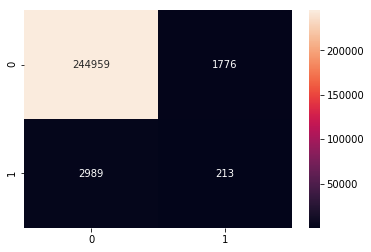

In [20]:
sn.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")

In [21]:
y_probs

[array([9.99987928e-01, 1.20310858e-08, 1.77165035e-06, ...,
        9.97720801e-01, 9.99719412e-01, 9.99999665e-01]),
 array([0.17307447, 0.01755913, 0.02798086, ..., 0.04092448, 0.06266188,
        0.04496509])]

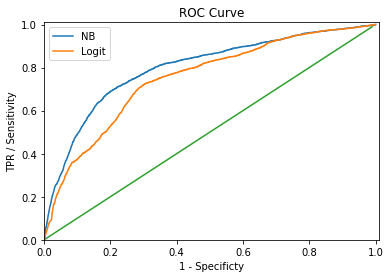

In [22]:
fpr_log,tpr_log,thr_log = roc_curve(y_test, y_probs[0])
fpr_nb,tpr_nb,thr_nb = roc_curve(y_test, y_probs[1])

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(fpr_nb,tpr_nb)
plt.plot(fpr_log,tpr_log)
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.legend(['NB','Logit'])
plt.show() 

In [23]:
print('AUC-NB=', auc(fpr_nb, tpr_nb))
print('AUC-Logit=', auc(fpr_log, tpr_log))

AUC-NB= 0.7973757504109225
AUC-Logit= 0.7498715940995143


In [24]:
models = [svm.SVC(),
          KNeighborsClassifier()]

In [25]:
params = [
    
    [
        {'C': [10], 'kernel': ['linear']},
          
        {'C': [10], 'gamma': [0.01], 'kernel': ['rbf']}
    ],
          {'n_neighbors': [3,5],
           'weights' : ['uniform'],
           'p' : [1]}
]

In [26]:
# Con estos modelos tarda mil años...

'''for i in range(len(models)):
    gs = GridSearchCV(estimator=models[i], param_grid=params[i], scoring='accuracy', cv=3, n_jobs=-1, verbose=10)
    print (gs)
    fit = gs.fit(x_train, y_train)
    grids.append(fit)'''

"for i in range(len(models)):\n    gs = GridSearchCV(estimator=models[i], param_grid=params[i], scoring='accuracy', cv=3, n_jobs=-1, verbose=10)\n    print (gs)\n    fit = gs.fit(x_train, y_train)\n    grids.append(fit)"